# Processing the IR dataset

In [1]:
from spectrochempy.api import *
options.log_level=ERROR


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


We read the .scp saved previously

In [2]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

for key, sample in samples.items():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    filename = basename + '.scp'
    sample['IR'] = NDDataset.read( filename)

We will resize the data in the interesting region of wavenumbers

<IPython.core.display.Javascript object>


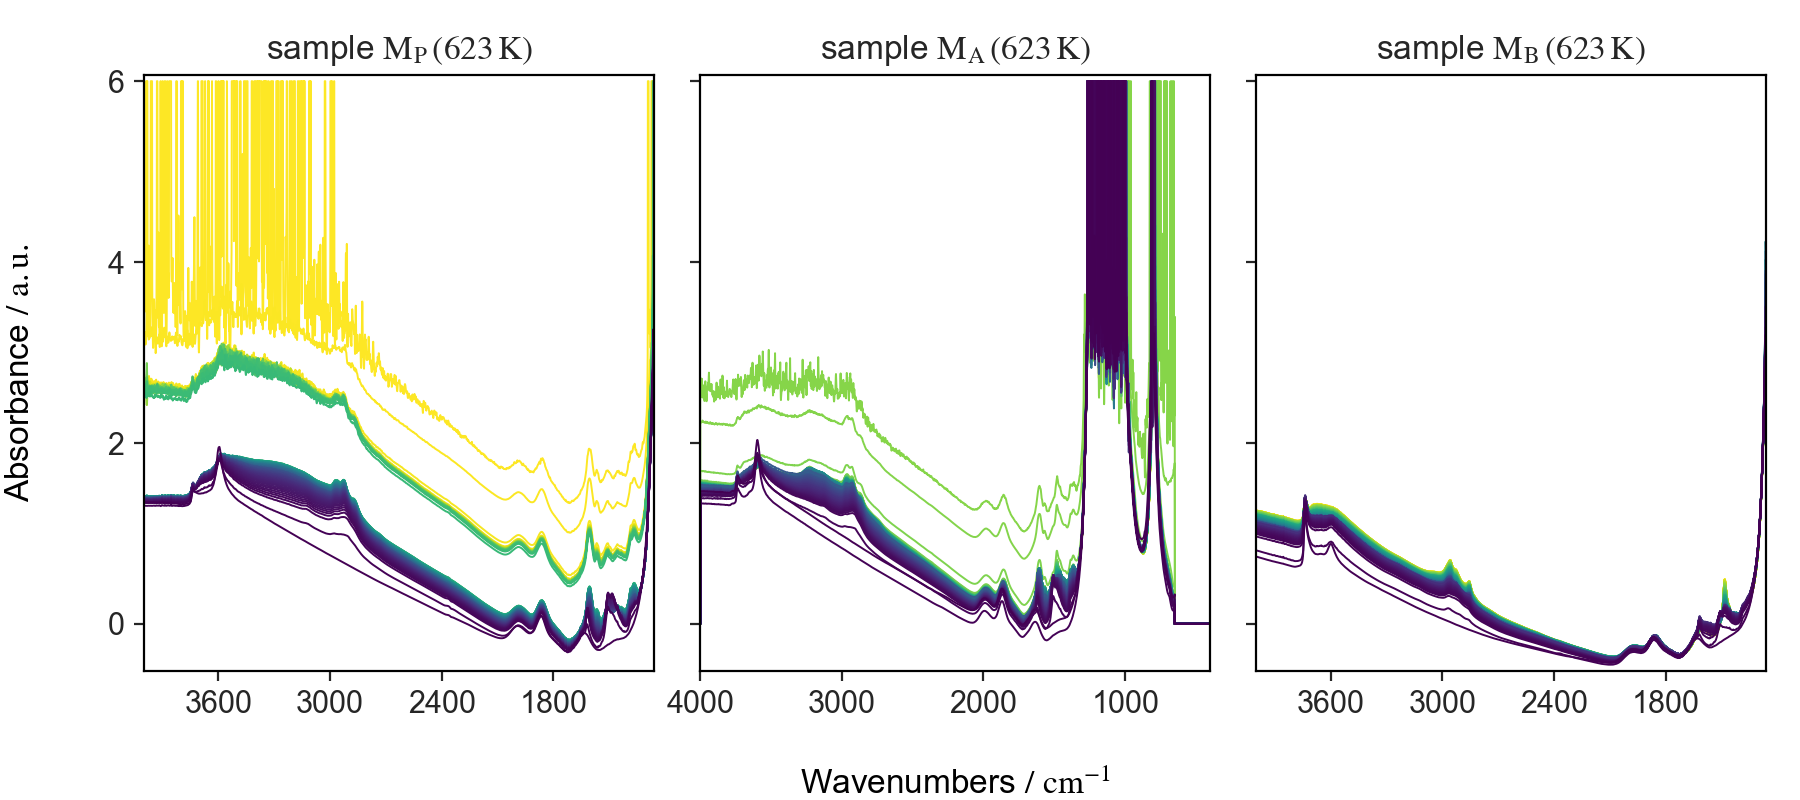

In [3]:
sources = [sample['IR'] for sample in samples.values()]
labels = ["sample "+sample['label'] for sample in samples.values()]

_ = multiplot_stack(sources=sources, labels=labels, nrow=1, ncol=3, figsize=(9,4), sharex=False,
                sharey=True, style='sans')

## Masking bad data

Clearly some of the spectra above displayed have problem with noise, or some experiment artifacts. Let's mask them. 

First, we will make a copy of the data, to be sure not to modified them before finishing alll the processing.

Then, we will select the region of interest.

#####  Some notes about Slicing

Slicing can be done by index, coordinates or labels (when they are present).

* `P350[:, 10]` for colomn slicing (here we get the 10th column (with index starting at 0!))
* or `P350[10]` for row slicing

As said above, we can also slice using the real coordinates. For example,

* `P350[:, 3000.0:3100.0]` will select all columns from wavenumbers 3000 to 3100. 

**IMPORTANT** : when doing such slicing, the wavenumbers must be expressed as floating numbers (with the decimal separator present) or it will fail!.

Here we want to leave only a selection of wavenumbers (between 4000. and 1290. cm$^{-1}$). Let's try to mask them. It is just necessary to affect the value **`masked`** to the data we want to mask:



In [4]:
for key, sample in samples.items():
    sample['IR'][:,400.:1290.] = masked 
    

Here we have masked the undesired data using coordinates slicing. However, note that when using coordinates, both limits needs to be set, as SpectroChemPy cannot infer wich direction will be masked)

Let's display the results

<IPython.core.display.Javascript object>


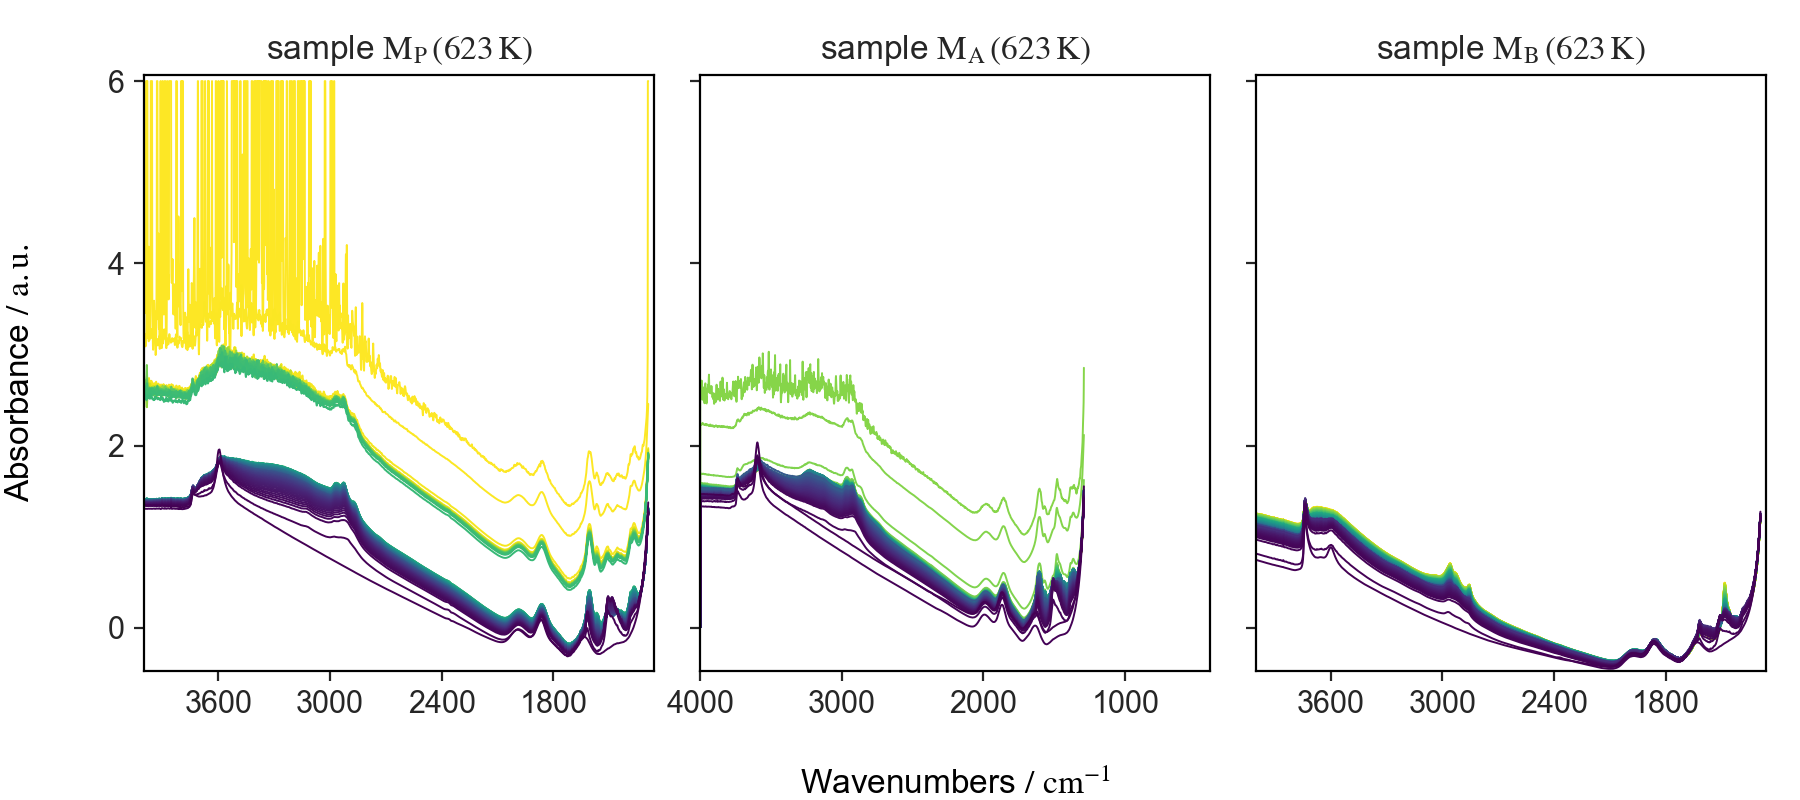

In [5]:
sources = [sample['IR'] for sample in samples.values()]
labels = ["sample "+sample['label'] for sample in samples.values()]

_ = multiplot_stack(sources=sources, labels=labels, nrow=1, ncol=3, figsize=(9,4), sharex=False,
                sharey=True, style='sans')

To remove a mask, the only way is to remove **all** masks. It cannot be done selectively!

<IPython.core.display.Javascript object>


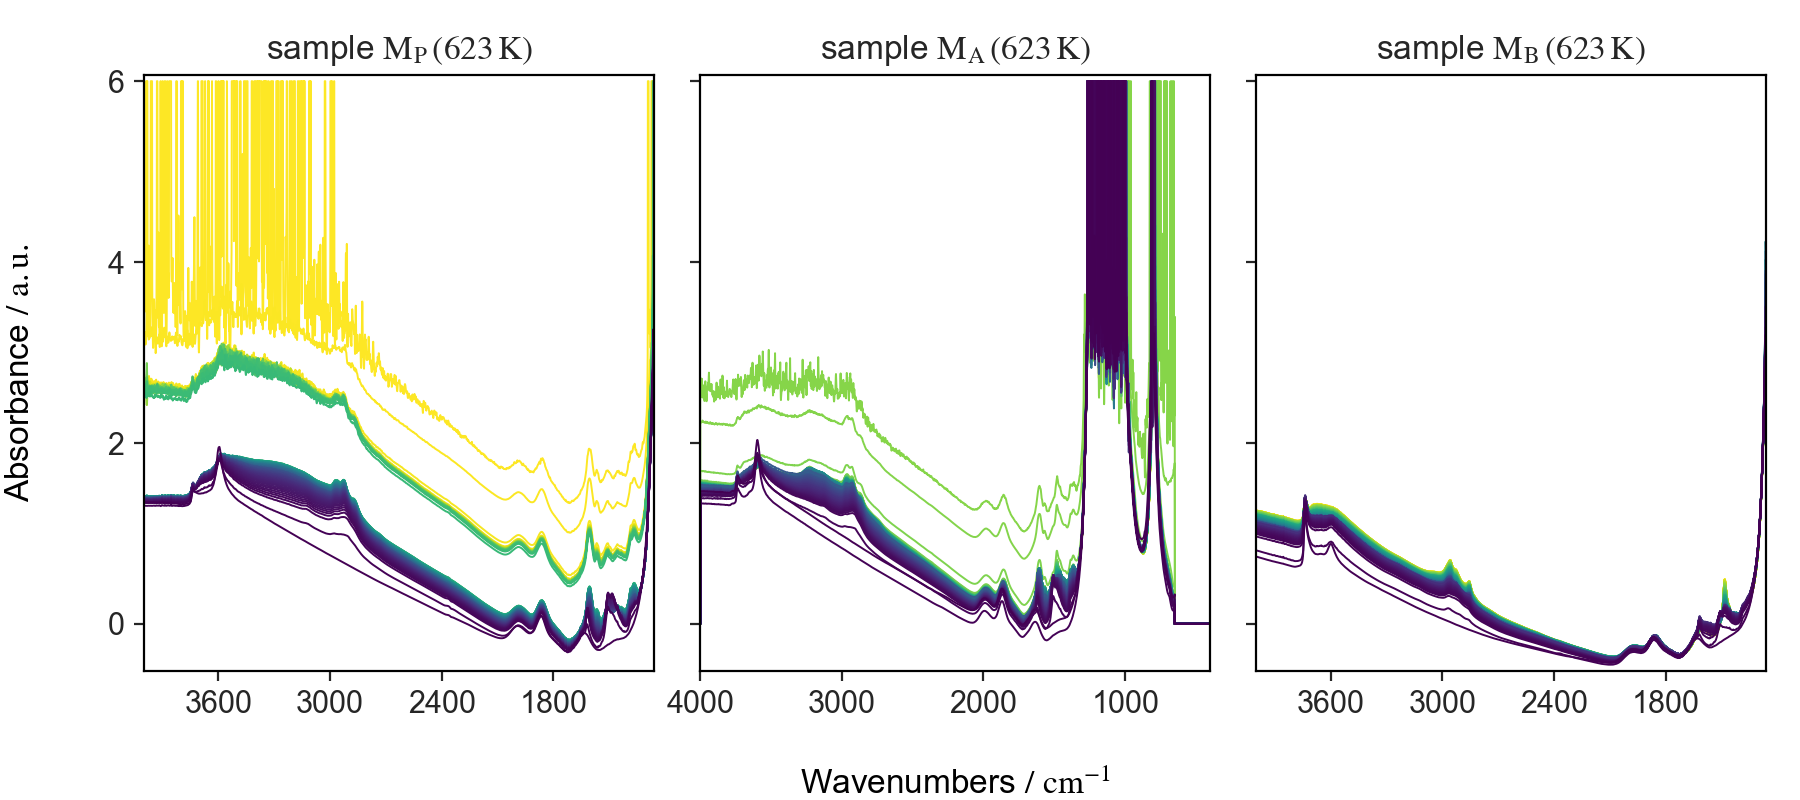

In [6]:
for key, sample in samples.items():
    sample['IR'].remove_masks()

_ = multiplot_stack(sources=sources, labels=labels, nrow=1, ncol=3, figsize=(9,4), sharex=False,
                sharey=True, style='sans')

Actually, because we want to select a region of interest, it might be simple to just keep this region (no need to use masks for this). WE will slice this and stor this for further use.

In [7]:
for key, sample in samples.items():
    s = sample['IR'][:,1290.:4000.]  # such slicing is not done inplace. Original data are preserved.
    sample['IR'] = s                 # we thus need to force the change to keep this modification in the
                                     # original data.
        
    # save the data in a `scp` file
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    sample['IR'].save(basename + '_corrected.scp')

### Masking bad data for sample P350

May be, besides just slicing as above explained, it is useful to use the an interactive window to mask some values. Also because, it appears that mainly the data to remove correspond to some row it may be interesting to work on transposed data (we use the operator `.T`):

<IPython.core.display.Javascript object>


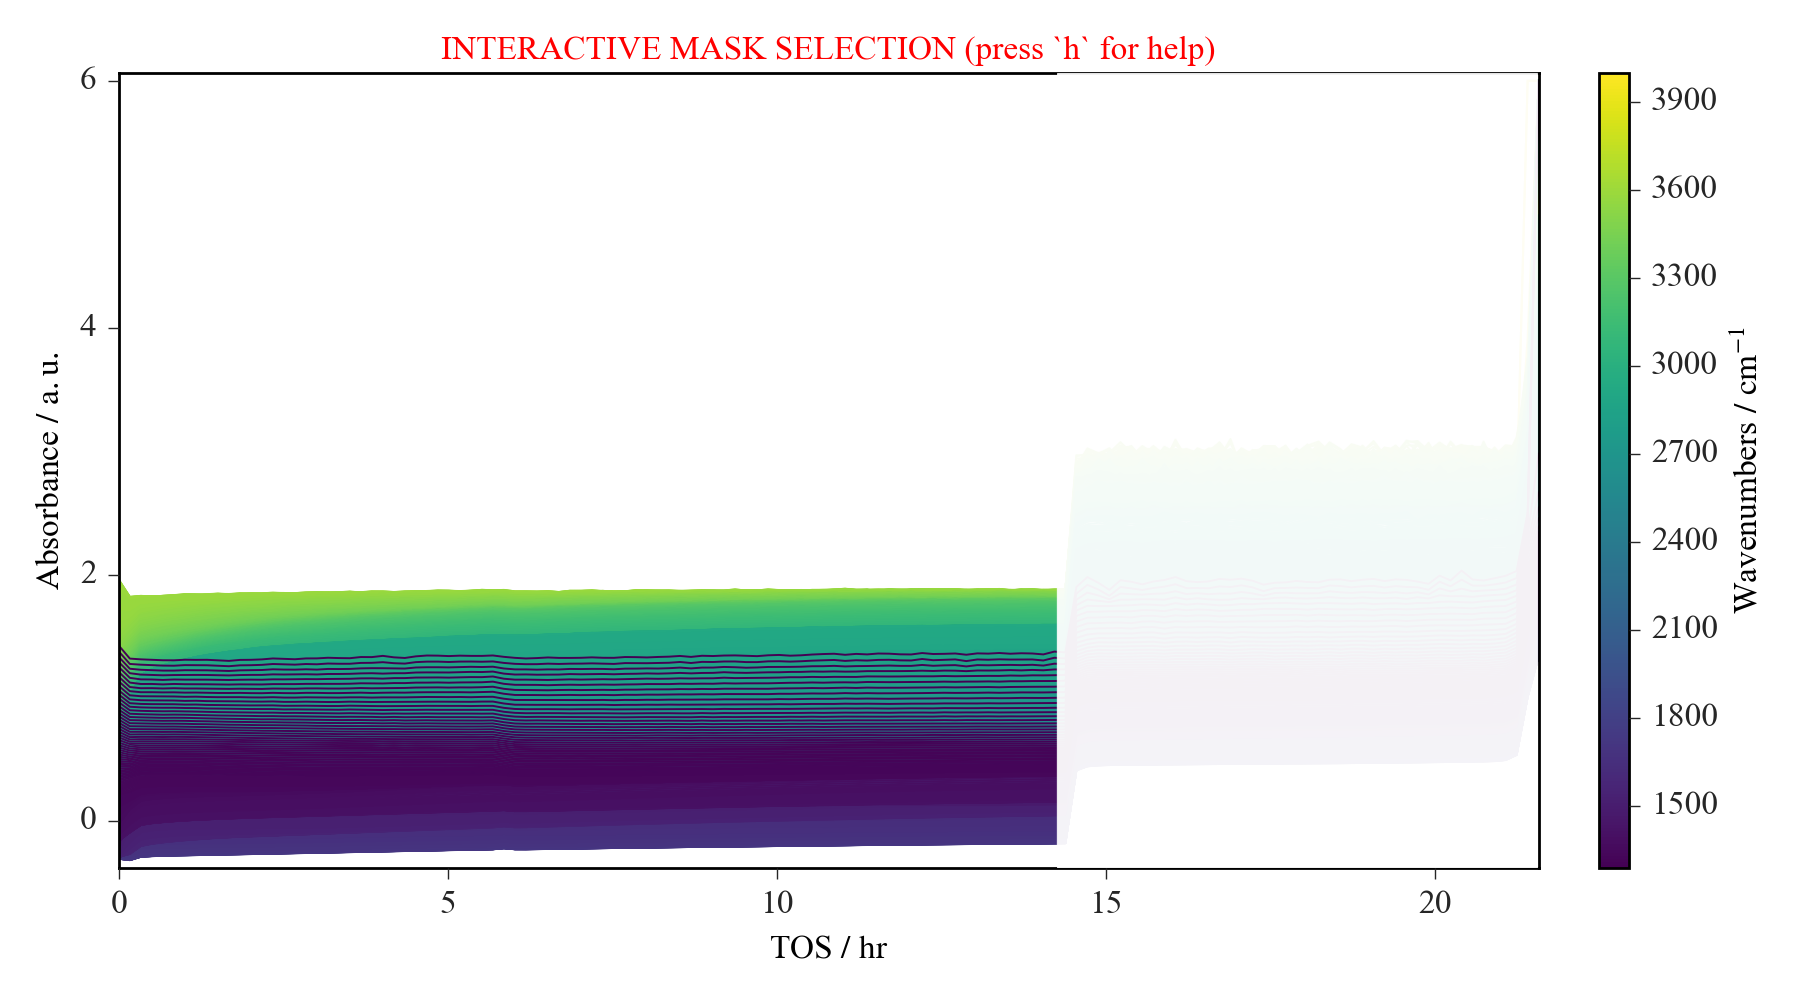

In [8]:
P350T = samples['P350']['IR'].T
_ = P350T.interactive_masks(figsize=(9,5))

<IPython.core.display.Javascript object>


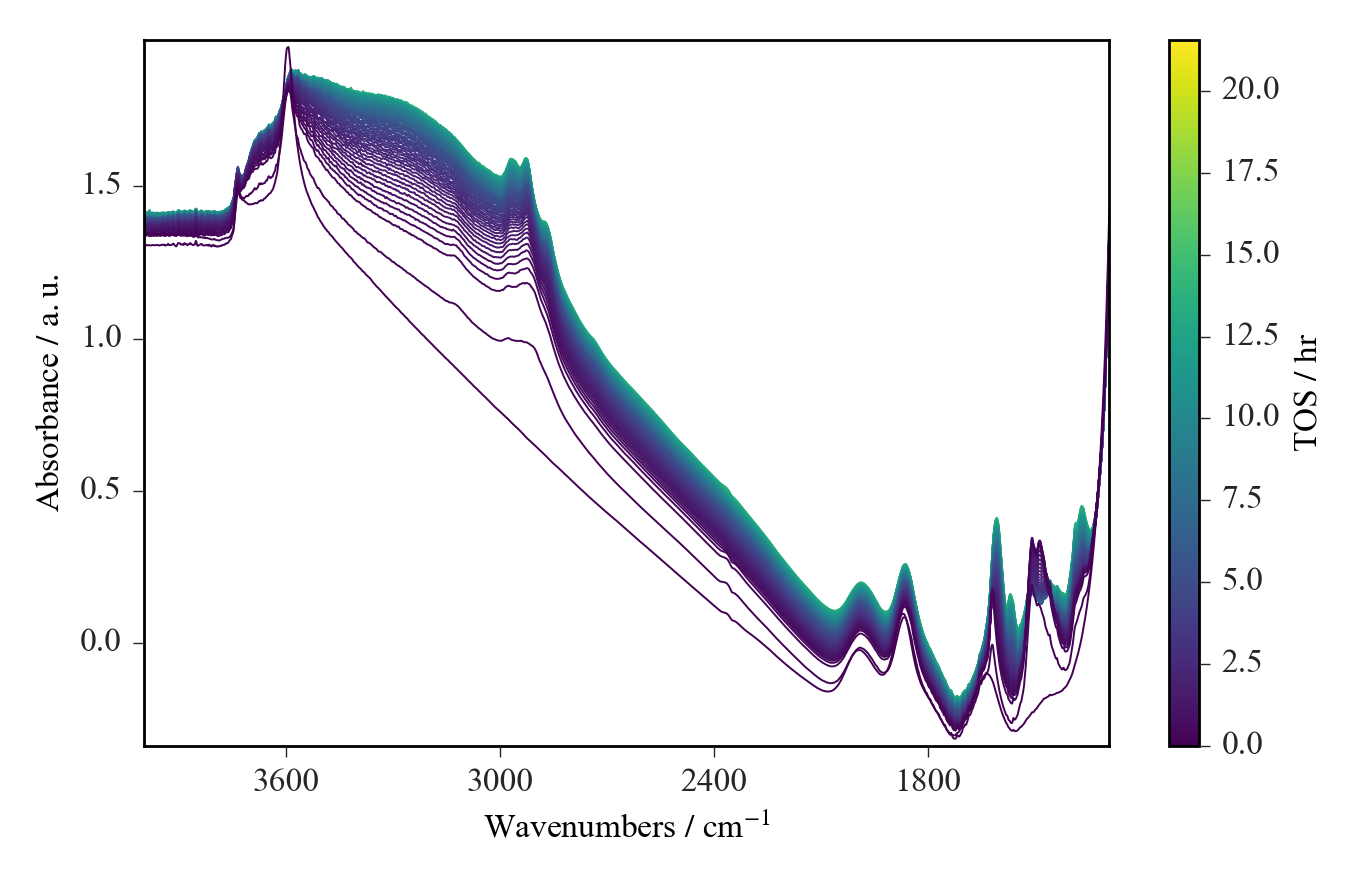

In [9]:
P350T.T.plot_stack()
# keep this 
P350 = P350T.T

Put back the masked data into the original

In [10]:
samples['P350']['IR'] = P350 

### Masking bad data for sample A350

Again we will work on transposed data

<IPython.core.display.Javascript object>


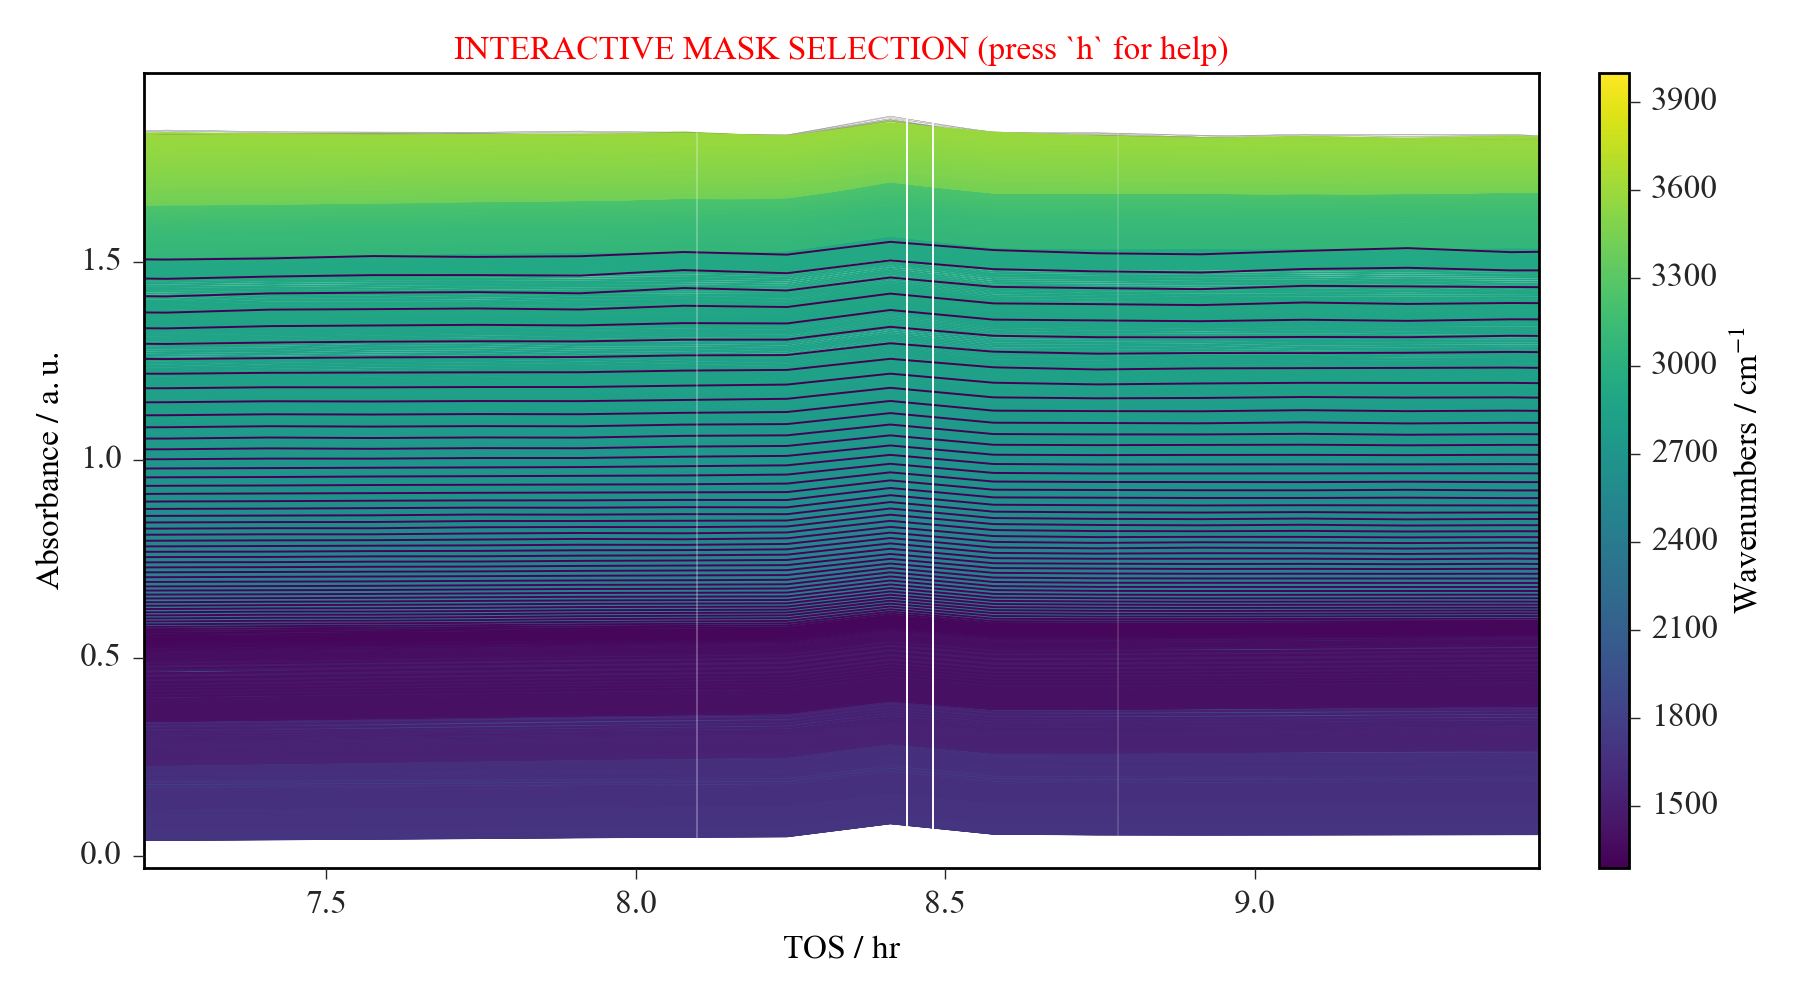

In [13]:
A350T= samples['A350']['IR'].T
A350T.interactive_masks(figsize=(9,5))

In [12]:
samples

{'A350': {'IR': NDDataset: [[   1.600,    1.552, ...,    1.467,    1.466],
              [   1.462,    1.417, ...,    1.332,    1.333],
              ..., 
              [   1.536,    1.486, ...,    1.572,    1.570],
              [   1.539,    1.487, ...,    1.573,    1.572]] a.u.,
  'label': '$\\mathrm{M_A}\\,(623\\,K)$'},
 'B350': {'IR': NDDataset: [[   1.316,    1.274, ...,    0.744,    0.745],
              [   1.256,    1.215, ...,    0.813,    0.814],
              ..., 
              [   1.261,    1.218, ...,    1.252,    1.253],
              [   1.253,    1.211, ...,    1.251,    1.253]] a.u.,
  'label': '$\\mathrm{M_B}\\,(623\\,K)$'},
 'P350': {'IR': NDDataset: [[   1.424,    1.376, ...,    1.345,    1.345],
              [   1.319,    1.276, ...,    1.305,    1.305],
              ..., 
              [  --,   --, ...,   --,   --],
              [  --,   --, ...,   --,   --]] a.u.,
  'label': '$\\mathrm{M_P}\\,(623\\,K)$'}}

In [16]:
samples['P350']['IR']

NDDataset: [[   1.424,    1.376, ...,    1.345,    1.345],
            [   1.319,    1.276, ...,    1.305,    1.305],
            ..., 
            [  --,   --, ...,   --,   --],
            [  --,   --, ...,   --,   --]] a.u.

<IPython.core.display.Javascript object>


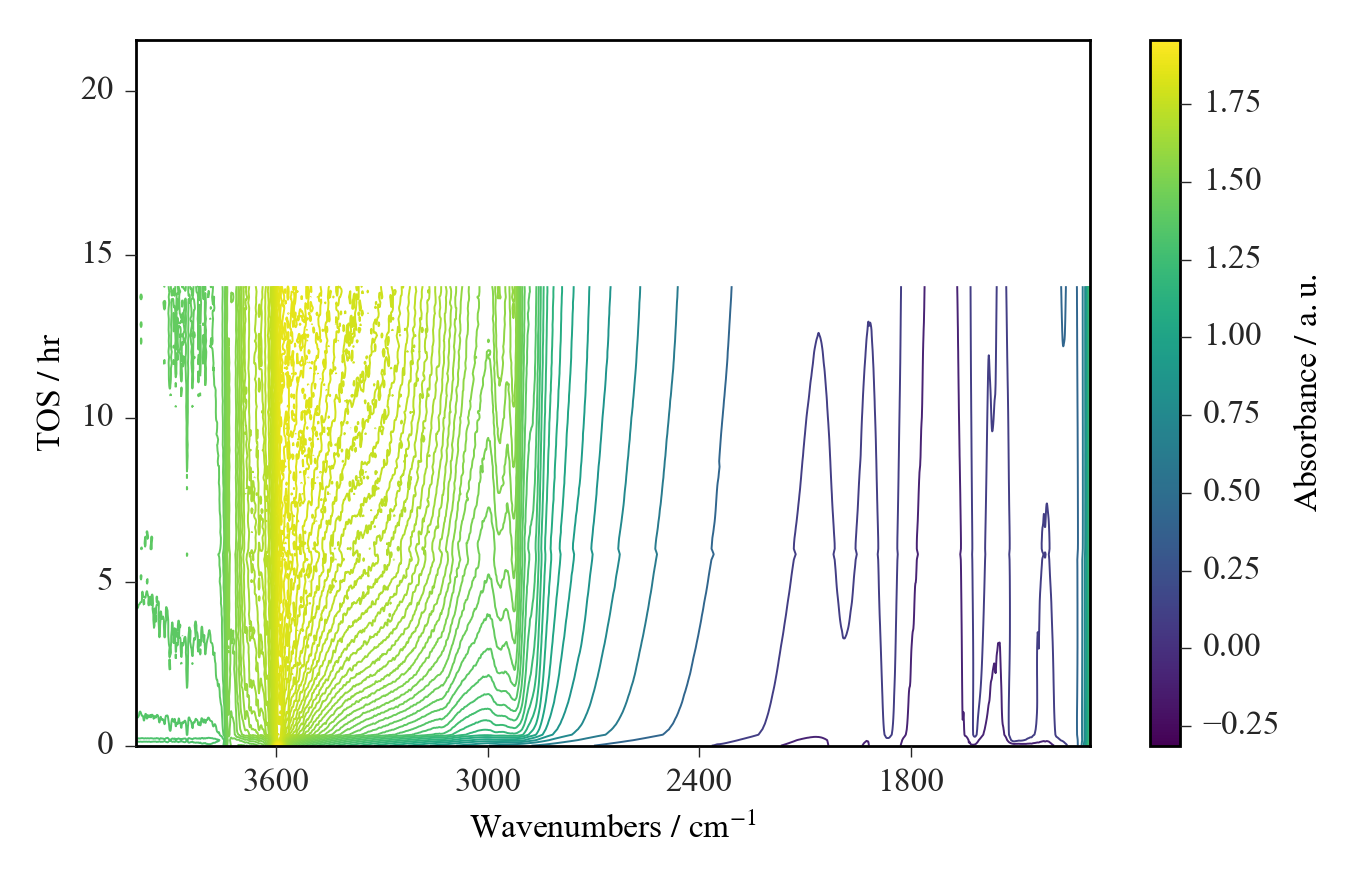

In [17]:
samples['P350']['IR'].plot()